In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import platform
import matplotlib.font_manager as fm

# 서울 경기 자전거 사고 건수 

## 서울 자전거 사고 건수

In [78]:
df = pd.read_csv("data/서울_2022_자전거_교통사고.csv", header=[0, 1, 2])
df = df.drop(columns='자치구별(1)', level=0)

# 열 이름 정리
# 멀티 인덱스 레벨을 결합하여 새로운 열 이름을 만듭니다.
# (자치구별(2), 자전거 가해운전자 교통사고, 발생건수 (건)) -> 자치구_가해_발생건수
# (자치구별(2), 자전거 피해운전자 교통사고, 발생건수 (건)) -> 자치구_피해_발생건수
new_columns = []
for col in df.columns:
    if col[0] == '자치구별(2)':
        new_columns.append('자치구')
    elif '발생건수 (건)' in col:
        if '가해운전자' in col[1]:
            new_columns.append('가해운전자_사고발생건수(건)')
        elif '피해운전자' in col[1]:
            new_columns.append('피해운전자_사고발생건수(건)')
    else:
        # 발생건수가 아닌 사망자수나 부상자수 열은 제외합니다.
        new_columns.append(None)

# 발생건수 관련 열만 선택하고 열 이름 설정
df.columns = new_columns
df_accidents = df.iloc[:, [0, 1, 4]].copy() # '자치구', '가해운전자_사고발생건수(건)', '피해운전자_사고발생건수(건)' 선택

# '소계' 행 제거
df_accidents = df_accidents[df_accidents['자치구'] != '소계'].reset_index(drop=True)

# 숫자로 변환 가능한 열을 정수형으로 변환
for col in ['가해운전자_사고발생건수(건)', '피해운전자_사고발생건수(건)']:
    df_accidents[col] = pd.to_numeric(df_accidents[col], errors='coerce').astype('Int64')

print(df_accidents)

     자치구  가해운전자_사고발생건수(건)  피해운전자_사고발생건수(건)
0    종로구               30               16
1     중구               24               20
2    용산구               30               37
3    성동구               85               59
4    광진구               41               28
5   동대문구              114               83
6    중랑구               88               85
7    성북구               39               39
8    강북구               41               45
9    도봉구               41               21
10   노원구               85               71
11   은평구               50               54
12  서대문구               34               35
13   마포구               49               56
14   양천구               47               64
15   강서구              112              110
16   구로구               80               55
17   금천구               30               22
18  영등포구              173              137
19   동작구               54               39
20   관악구               36               21
21   서초구               48               38
22   강남구   

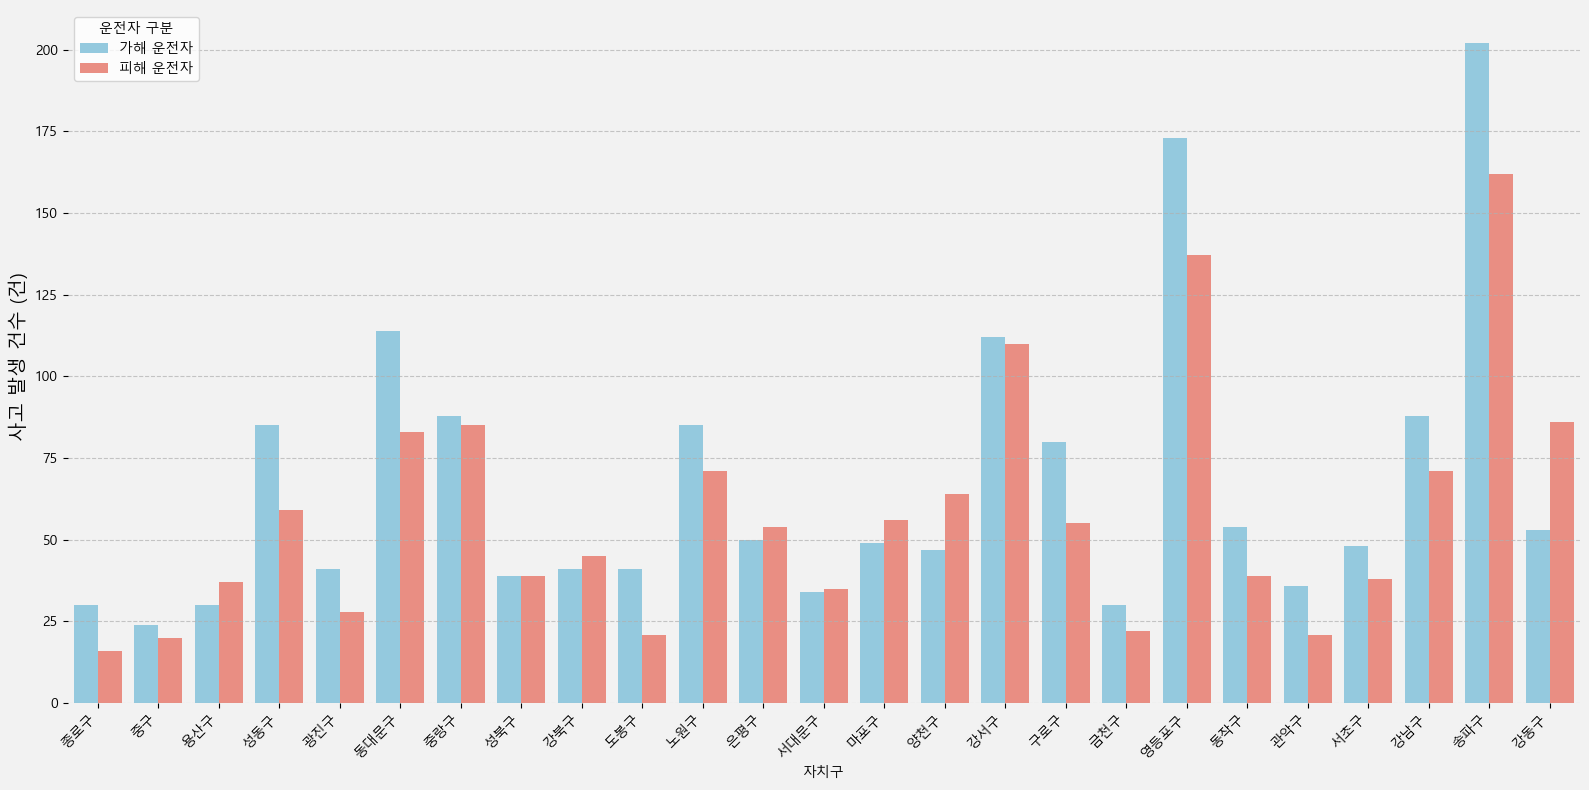

In [79]:
warnings.filterwarnings('ignore')

df_melted = df_accidents.melt(
    id_vars='자치구',
    value_vars=['가해운전자_사고발생건수(건)', '피해운전자_사고발생건수(건)'],
    var_name='구분',
    value_name='사고 발생 건수 (건)'
)

# '구분' 열의 이름을 보기 좋게 변경
df_melted['구분'] = df_melted['구분'].replace({
    '가해운전자_사고발생건수(건)': '가해 운전자',
    '피해운전자_사고발생건수(건)': '피해 운전자'
})
# 한글 폰트 설정
def set_korean_font():
    # 운영체제 확인
    sys_os = platform.system()

    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Linux':
        # Colab 등 Linux 환경에서 나눔 폰트 설치 및 설정
        try:
            # 나눔 폰트 설치 (Colab에서 필요)
            import os
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            
            # 폰트 캐시 재빌드
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            
            font_name = 'NanumGothic'
        except Exception:
            # 나눔 폰트 설치에 실패하면 기본 폰트로 설정
            print("나눔 폰트 설정에 실패했습니다. 수동으로 폰트를 설치하거나 폰트 이름을 확인해주세요.")
            font_name = 'sans-serif' # 기본 폰트 사용
    else:
        font_name = 'sans-serif'

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 폰트 설정 함수 실행
set_korean_font()

# 데이터 시각화
fig, ax = plt.subplots(figsize=(16, 8))
BACKGROUND_COLOR = '#F2F2F2' 
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# seaborn barplot을 사용하여 그룹화된 막대 그래프 생성
sns.barplot(
    x='자치구',
    y='사고 발생 건수 (건)',
    hue='구분',  # 이 열을 기준으로 막대를 그룹화
    data=df_melted,
    palette={'가해 운전자': 'skyblue', '피해 운전자': 'salmon'}
)

# 축(Spines) 제거 (요청 반영)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 그래프 제목 및 라벨 설정
# plt.title('2022년 서울 자치구별 자전거 교통사고 발생 건수 비교', fontsize=18)
# plt.xlabel('자치구', fontsize=14)
plt.ylabel('사고 발생 건수 (건)', fontsize=14)

# x축 레이블 회전 및 조정
plt.xticks(rotation=45, ha='right')

# 범례 표시
plt.legend(title='운전자 구분', loc='upper left')

# 그리드 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show();

## 경기도 자전거 사고건수

In [80]:
# CSV 파일 로드
try:
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='cp949')
except UnicodeDecodeError:
    # cp949로도 실패할 경우 euc-kr 시도
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='euc-kr')

# 필요한 열 선택 및 결측치 제거
# '시군명' (자치구)과 '발생건수' 열만 사용
df_accidents_gg = df_gg[['시군명', '발생건수']].copy()

# '발생건수'를 숫자로 변환 (오류 발생 시 NaN 처리)
df_accidents_gg['발생건수'] = pd.to_numeric(df_accidents_gg['발생건수'], errors='coerce')

# NaN 값 제거 (사고 건수와 시군명 모두 유효한 행만 남김)
df_accidents_gg = df_accidents_gg.dropna(subset=['시군명', '발생건수'])

# '시군명' 기준으로 사고 발생 건수 합산 (시 단위 집계)
df_city_accidents = df_accidents_gg.groupby('시군명')['발생건수'].sum().reset_index()
df_city_accidents.columns = ['시군명', '총_사고발생건수(건)']

df_city_accidents['총_사고발생건수(건)'] = df_city_accidents['총_사고발생건수(건)'].astype(int)

# 사고 건수 내림차순 정렬
df_city_accidents = df_city_accidents.sort_values(by='총_사고발생건수(건)', ascending=False).reset_index(drop=True)

df_city_accidents

,시군명,총_사고발생건수(건)
0,안산시,44
1,김포시,27
2,수원시,22
3,고양시,20
4,의정부시,19
5,평택시,18
6,하남시,18
7,시흥시,14
8,성남시,11
9,구리시,8


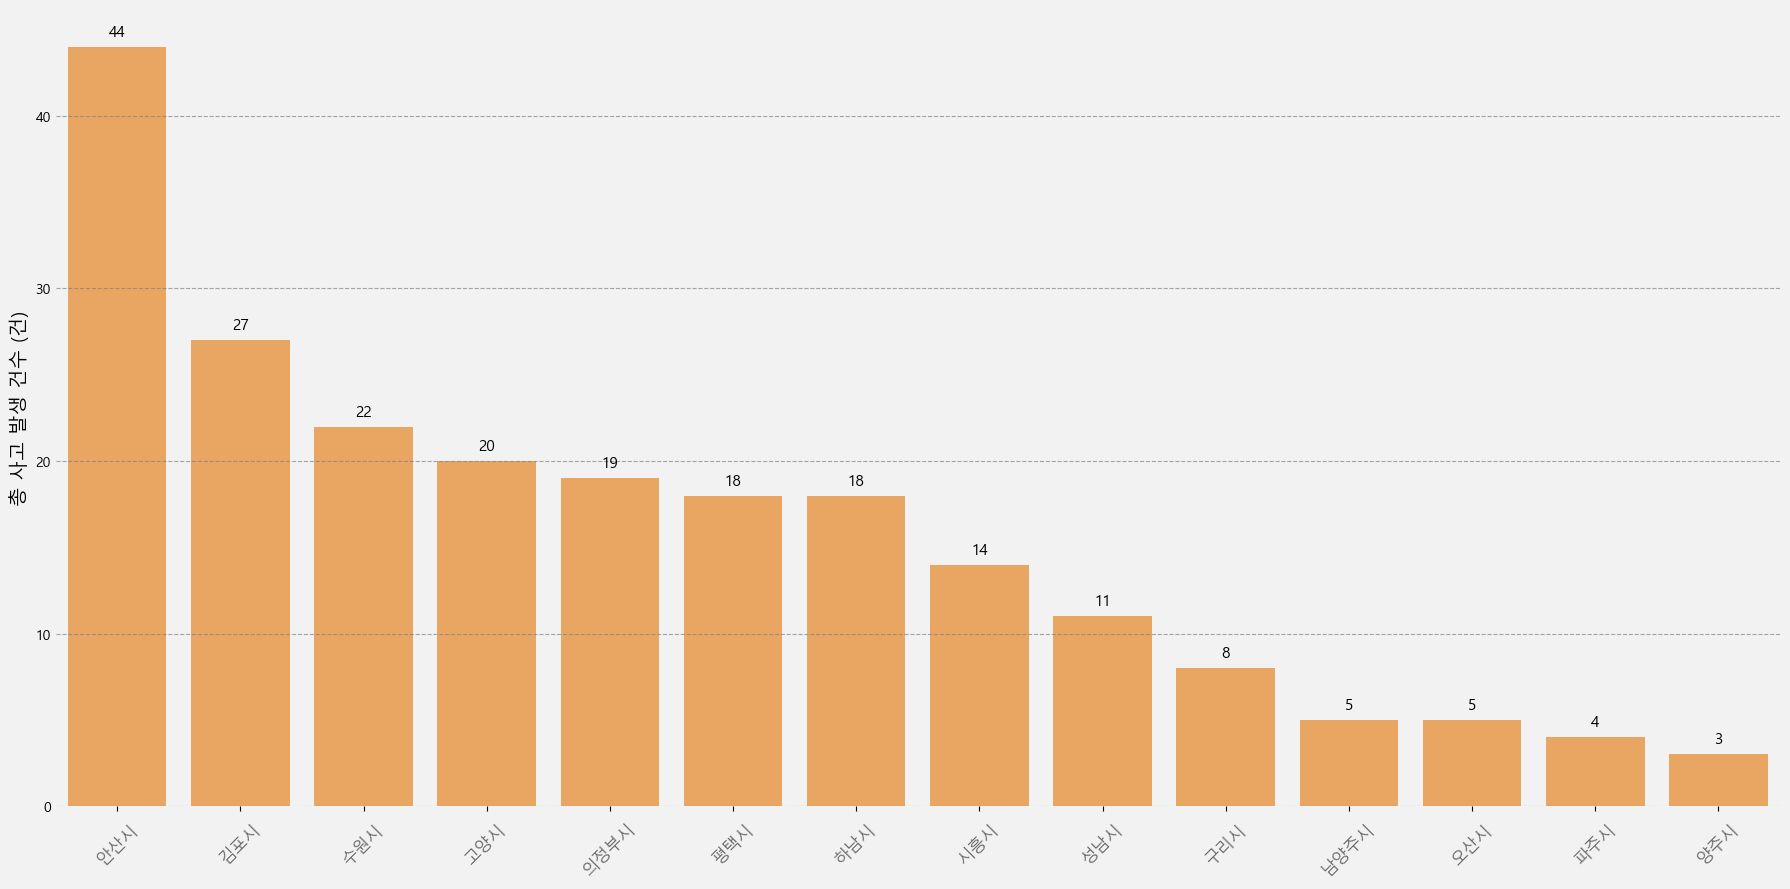

In [81]:
# SettingWithCopyWarning 등의 경고 무시
warnings.filterwarnings('ignore')

try:
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='cp949')
except UnicodeDecodeError:
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='euc-kr')

df_accidents_gg = df_gg[['시군명', '발생건수']].copy()
df_accidents_gg['발생건수'] = pd.to_numeric(df_accidents_gg['발생건수'], errors='coerce').astype('Int64')
df_accidents_gg = df_accidents_gg.dropna(subset=['시군명', '발생건수'])

df_city_accidents = df_accidents_gg.groupby('시군명')['발생건수'].sum().reset_index()
df_city_accidents.columns = ['시군명', '총_사고발생건수(건)']
df_city_accidents['총_사고발생건수(건)'] = df_city_accidents['총_사고발생건수(건)'].astype(int)
df_city_accidents = df_city_accidents.sort_values(by='총_사고발생건수(건)', ascending=False).reset_index(drop=True)

def set_korean_font():
    sys_os = platform.system()
    font_name = 'sans-serif'

    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Linux':
        try:
            import os
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            font_name = 'NanumGothic'
        except Exception:
            pass

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False 

set_korean_font()

fig, ax = plt.subplots(figsize=(18, 9))

BACKGROUND_COLOR = '#f2f2f2' 
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

bar_plot = sns.barplot(
    x='시군명',
    y='총_사고발생건수(건)',
    data=df_city_accidents,
    color='#FFA64D',
    ax=ax
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('')
ax.set_xticklabels([])

ax.tick_params(axis='y', length=0) 

def add_labels_with_city(plot, data_df):
    for i, p in enumerate(plot.patches):
        height = p.get_height()
        city_name = data_df['시군명'].iloc[i]

        plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=11, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
        
        plot.annotate(
            city_name,
            (p.get_x() + p.get_width() / 2, 0),
            ha='center', va='top',
            fontsize=12, color='dimgray',
            rotation=45,
            xytext=(0, -10), textcoords='offset points'
        )

add_labels_with_city(bar_plot, df_city_accidents)

ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

ax.set_ylabel('총 사고 발생 건수 (건)', fontsize=14)

plt.tight_layout()
plt.show()

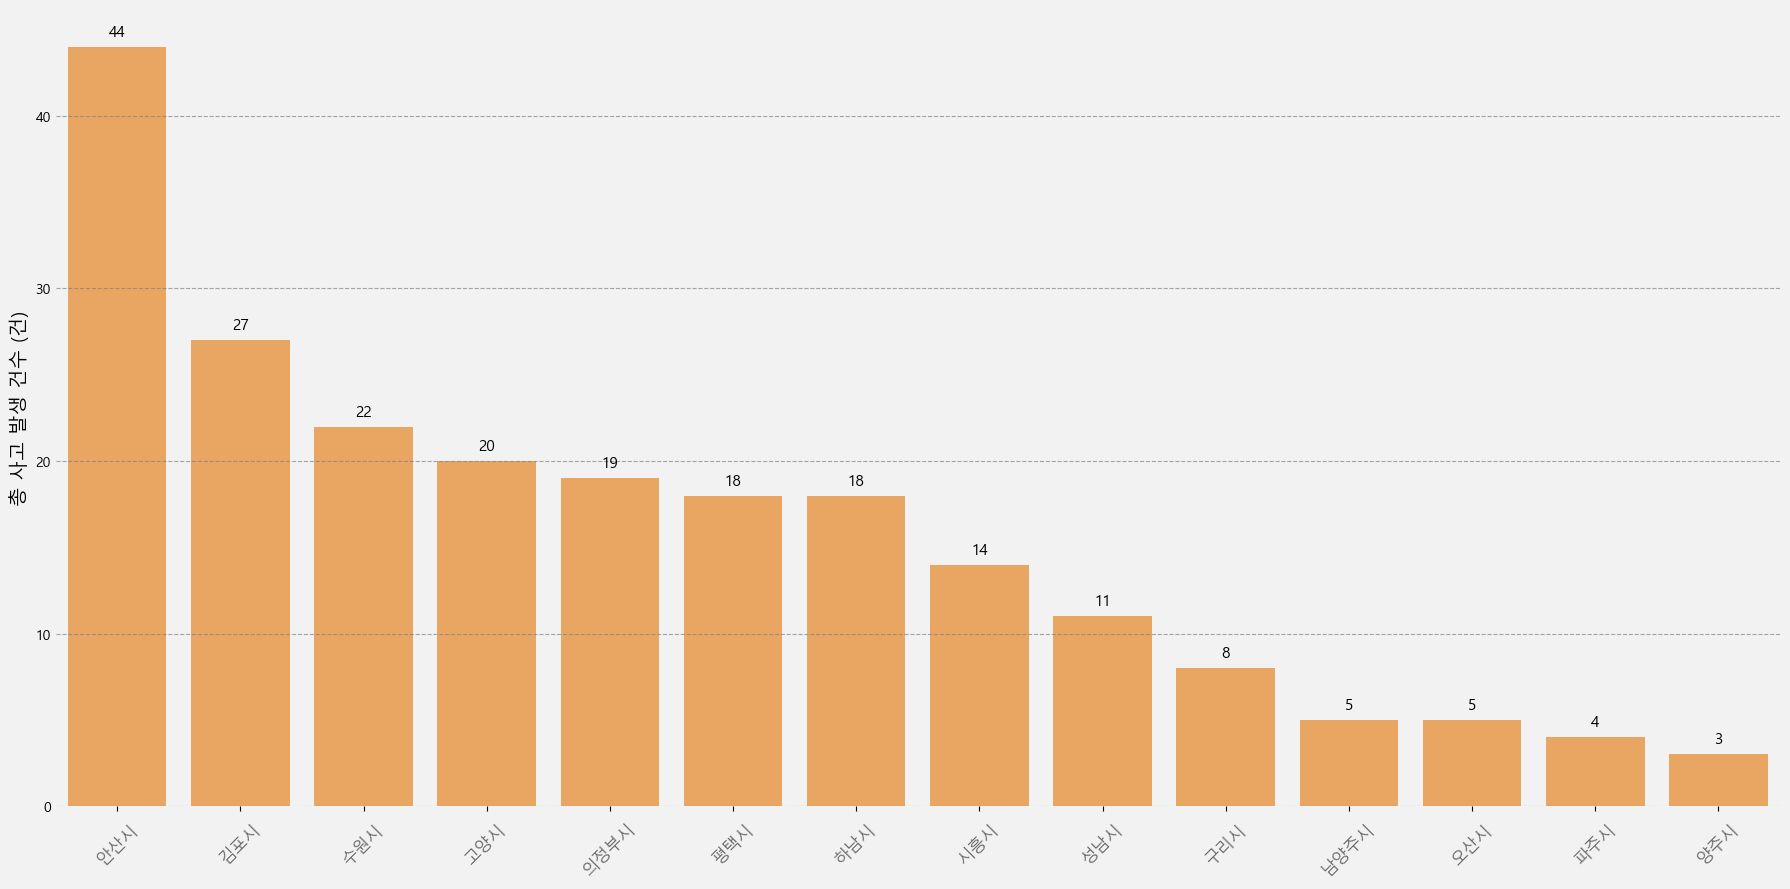

In [82]:
# SettingWithCopyWarning 등의 경고 무시
warnings.filterwarnings('ignore')

try:
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='cp949')
except UnicodeDecodeError:
    df_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='euc-kr')

df_accidents_gg = df_gg[['시군명', '발생건수']].copy()
df_accidents_gg['발생건수'] = pd.to_numeric(df_accidents_gg['발생건수'], errors='coerce').astype('Int64')
df_accidents_gg = df_accidents_gg.dropna(subset=['시군명', '발생건수'])

df_city_accidents = df_accidents_gg.groupby('시군명')['발생건수'].sum().reset_index()
df_city_accidents.columns = ['시군명', '총_사고발생건수(건)']
df_city_accidents['총_사고발생건수(건)'] = df_city_accidents['총_사고발생건수(건)'].astype(int)
df_city_accidents = df_city_accidents.sort_values(by='총_사고발생건수(건)', ascending=False).reset_index(drop=True)

def set_korean_font():
    sys_os = platform.system()
    font_name = 'sans-serif'

    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Linux':
        try:
            import os
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            font_name = 'NanumGothic'
        except Exception:
            pass

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False 

set_korean_font()

fig, ax = plt.subplots(figsize=(18, 9))

BACKGROUND_COLOR = '#f2f2f2' 
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

bar_plot = sns.barplot(
    x='시군명',
    y='총_사고발생건수(건)',
    data=df_city_accidents,
    color='#FFA64D',
    ax=ax
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('')
ax.set_xticklabels([])

ax.tick_params(axis='y', length=0) 

def add_labels_with_city(plot, data_df):
    for i, p in enumerate(plot.patches):
        height = p.get_height()
        city_name = data_df['시군명'].iloc[i]

        plot.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=11, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
        
        plot.annotate(
            city_name,
            (p.get_x() + p.get_width() / 2, 0),
            ha='center', va='top',
            fontsize=12, color='dimgray',
            rotation=45,
            xytext=(0, -10), textcoords='offset points'
        )

add_labels_with_city(bar_plot, df_city_accidents)

ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

ax.set_ylabel('총 사고 발생 건수 (건)', fontsize=14)

plt.tight_layout()
plt.show()

# 서울시 자전거 사고율

In [60]:
# 해당csv파일에 서울인구수만 추출하기

warnings.filterwarnings('ignore')

try:
    df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='cp949')
except UnicodeDecodeError:
    try:
        df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='euc-kr')
        except UnicodeDecodeError:
            df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='latin-1')

seoul_data_mask = (df_pop['시군구명'].str.endswith('구', na=False)) & \
                  (~df_pop['시군구명'].str.endswith('시', na=False)) & \
                  (~df_pop['시군구명'].str.endswith('군', na=False)) & \
                  (df_pop['시군구명'] != '전국') & \
                  (df_pop['시군구명'] != '합계')

df_seoul_pop = df_pop[seoul_data_mask].copy()

df_seoul_pop = df_seoul_pop[['시군구명', '인구수']].copy()
df_seoul_pop.columns = ['자치구', '인구수']
df_seoul_pop['인구수'] = pd.to_numeric(df_seoul_pop['인구수'], errors='coerce').astype('Int64')
df_seoul_pop = df_seoul_pop.reset_index(drop=True)

df = pd.read_csv("data/서울_2022_자전거_교통사고.csv", header=[0, 1, 2])
df = df.drop(columns='자치구별(1)', level=0)

new_columns = []
for col in df.columns:
    if col[0] == '자치구별(2)':
        new_columns.append('자치구')
    elif '발생건수 (건)' in col:
        if '가해운전자' in col[1]:
            new_columns.append('가해운전자_사고발생건수(건)')
        elif '피해운전자' in col[1]:
            new_columns.append('피해운전자_사고발생건수(건)')
    else:
        new_columns.append(None)

df.columns = new_columns
df_accidents = df.iloc[:, [0, 1, 4]].copy() 
df_accidents = df_accidents[df_accidents['자치구'] != '소계'].reset_index(drop=True)

for col in ['가해운전자_사고발생건수(건)', '피해운전자_사고발생건수(건)']:
    df_accidents[col] = pd.to_numeric(df_accidents[col], errors='coerce').astype('Int64')

# 총 사고 건수 계산
df_accidents['총_사고발생건수'] = df_accidents['가해운전자_사고발생건수(건)'] + df_accidents['피해운전자_사고발생건수(건)']
df_accidents = df_accidents[['자치구', '총_사고발생건수']].copy()


# 5. 인구 데이터와 사고 데이터를 '자치구' 기준으로 병합
df_seoul_merged = pd.merge(df_accidents, df_seoul_pop, on='자치구', how='inner')

# 6. 사고율 계산 (인구 10만 명당 사고 건수)
df_seoul_merged['사고율(10만명당)'] = (df_seoul_merged['총_사고발생건수'] / df_seoul_merged['인구수']) * 100000

# 7. 최종 데이터프레임 정리 (내림차순 정렬 및 소수점 정리)
df_seoul_rate = df_seoul_merged[['자치구', '총_사고발생건수', '인구수', '사고율(10만명당)']].copy()
df_seoul_rate = df_seoul_rate.sort_values(by='사고율(10만명당)', ascending=False).reset_index(drop=True)
df_seoul_rate['인구수'] = df_seoul_rate['인구수'].astype(int)
df_seoul_rate['사고율(10만명당)'] = df_seoul_rate['사고율(10만명당)'].round(2)

df_seoul_rate

,자치구,총_사고발생건수,인구수,사고율(10만명당)
0,영등포구,310,374794,82.71
1,동대문구,197,341149,57.75
2,송파구,364,654166,55.64
3,성동구,144,277361,51.92
4,중랑구,173,382155,45.27
5,강서구,222,563058,39.43
6,중구,44,121312,36.27
7,구로구,135,392405,34.4
8,종로구,46,139417,32.99
9,용산구,67,213151,31.43


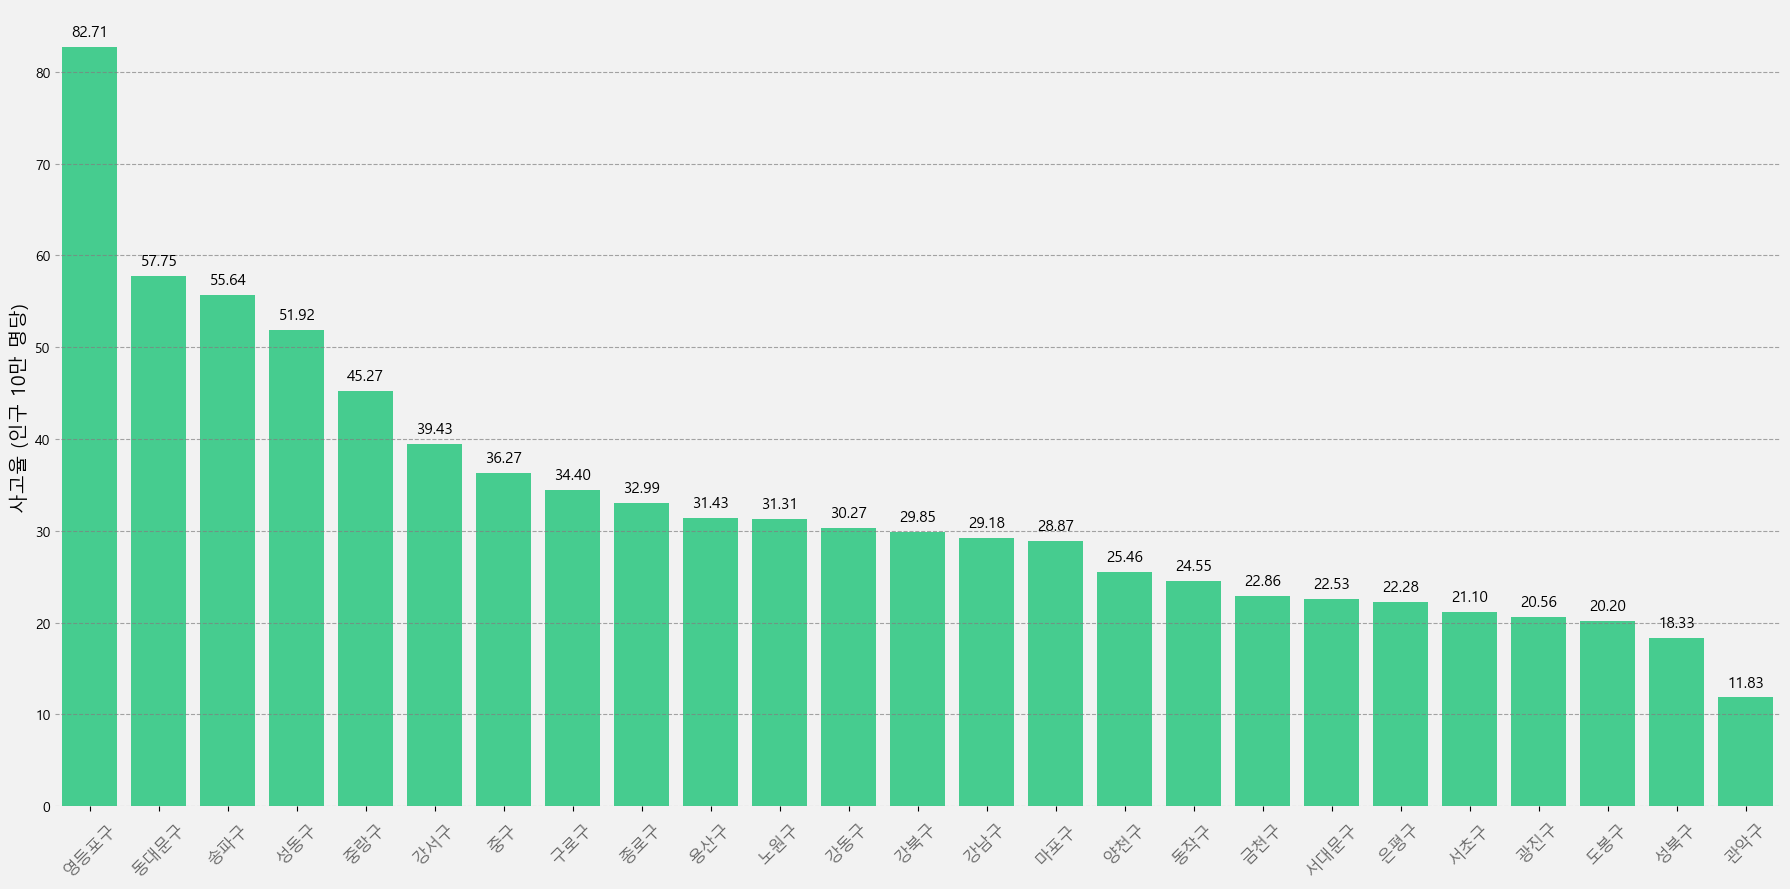

In [83]:
# 경고 무시 설정
warnings.filterwarnings('ignore')

# 1. df_seoul_rate 데이터프레임 생성 (인코딩 오류 수정 및 병합 로직 재현)
# 이 블록은 df_seoul_rate를 재현하기 위한 것이므로, 이미 데이터가 있다면 생략 가능
try:
    df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='cp949')
except UnicodeDecodeError:
    try:
        df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='euc-kr')
        except UnicodeDecodeError:
            df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='latin-1')

df_pop.columns = ['시군구명', '인구수', '면적(km2)', '인구밀도']
seoul_data_mask = (df_pop['시군구명'].str.endswith('구', na=False)) & \
                  (~df_pop['시군구명'].str.endswith('시', na=False)) & \
                  (~df_pop['시군구명'].str.endswith('군', na=False)) & \
                  (df_pop['시군구명'] != '전국') & \
                  (df_pop['시군구명'] != '합계')
df_seoul_pop = df_pop[seoul_data_mask].copy()
df_seoul_pop = df_seoul_pop[['시군구명', '인구수']].copy()
df_seoul_pop.columns = ['자치구', '인구수']
df_seoul_pop['인구수'] = pd.to_numeric(df_seoul_pop['인구수'], errors='coerce').astype('Int64')

df = pd.read_csv("data/서울_2022_자전거_교통사고.csv", header=[0, 1, 2])
df = df.drop(columns='자치구별(1)', level=0)

new_columns = []
for col in df.columns:
    if col[0] == '자치구별(2)':
        new_columns.append('자치구')
    elif '발생건수 (건)' in col:
        if '가해운전자' in col[1]:
            new_columns.append('가해운전자_사고발생건수(건)')
        elif '피해운전자' in col[1]:
            new_columns.append('피해운전자_사고발생건수(건)')
    else:
        new_columns.append(None)

df.columns = new_columns
df_accidents = df.iloc[:, [0, 1, 4]].copy() 
df_accidents = df_accidents[df_accidents['자치구'] != '소계'].reset_index(drop=True)

for col in ['가해운전자_사고발생건수(건)', '피해운전자_사고발생건수(건)']:
    df_accidents[col] = pd.to_numeric(df_accidents[col], errors='coerce').astype('Int64')

df_accidents['총_사고발생건수'] = df_accidents['가해운전자_사고발생건수(건)'] + df_accidents['피해운전자_사고발생건수(건)']
df_accidents = df_accidents[['자치구', '총_사고발생건수']].copy()

df_seoul_merged = pd.merge(df_accidents, df_seoul_pop, on='자치구', how='inner')
df_seoul_merged['사고율(10만명당)'] = (df_seoul_merged['총_사고발생건수'] / df_seoul_merged['인구수']) * 100000

df_seoul_rate = df_seoul_merged[['자치구', '총_사고발생건수', '인구수', '사고율(10만명당)']].copy()
df_seoul_rate = df_seoul_rate.sort_values(by='사고율(10만명당)', ascending=False).reset_index(drop=True)
df_seoul_rate['인구수'] = df_seoul_rate['인구수'].astype(int)
df_seoul_rate['사고율(10만명당)'] = df_seoul_rate['사고율(10만명당)'].round(2)


def set_korean_font():
    sys_os = platform.system()
    font_name = 'sans-serif'

    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Darwin':  # macOS
        font_name = 'AppleGothic'
    elif sys_os == 'Linux':
        try:
            import os
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            font_name = 'NanumGothic'
        except Exception:
            pass

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False 

set_korean_font()

# 3. 데이터 시각화
fig, ax = plt.subplots(figsize=(18, 9))

# 배경 색상 설정 (이전 요청: #f7f7f7)
BACKGROUND_COLOR = '#f2f2f2' 
COLOR_ACCIDENT = '#30e291'
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# seaborn barplot을 사용하여 막대 그래프 생성
bar_plot = sns.barplot(
    x='자치구',
    y='사고율(10만명당)',
    data=df_seoul_rate,
    color=COLOR_ACCIDENT,
    ax=ax
)

# 축(Spines) 제거
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# x축 레이블 제거
ax.set_xlabel('')
ax.set_xticklabels([])

# y축 눈금 선 제거
ax.tick_params(axis='y', length=0) 

# 막대 위에 사고율 수치 및 자치구명 표시
def add_labels_with_district(plot, data_df):
    for i, p in enumerate(plot.patches):
        height = p.get_height()
        district_name = data_df['자치구'].iloc[i]

        # 1. 사고율 수치 레이블 추가 (소수점 2자리까지 표시)
        plot.annotate(
            f'{height:.2f}', 
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=11, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
        
        # 2. 자치구명 레이블 추가 (x축을 대체)
        plot.annotate(
            district_name,
            (p.get_x() + p.get_width() / 2, 0),
            ha='center', va='top',
            fontsize=12, color='dimgray',
            rotation=45,
            xytext=(0, -10), textcoords='offset points'
        )

add_labels_with_district(bar_plot, df_seoul_rate)

# y축 선은 제거하고, 그리드 라인 유지
ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

# 그래프 제목 및 라벨 설정
# ax.set_title('서울시 자치구별 자전거 사고율 (인구 10만 명당)', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('사고율 (인구 10만 명당)', fontsize=14)

plt.tight_layout()
plt.show()

# 경기도 자전거 사고율

In [58]:
warnings.filterwarnings('ignore')

# 1. 경기도 인구 데이터 로드 및 정리
try:
    df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='cp949')
except UnicodeDecodeError:
    try:
        df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='utf-8')
    except UnicodeDecodeError:
        df_pop = pd.read_csv("data/경기서울_인구.csv", encoding='latin-1')
        
# 컬럼명 정리
df_pop.columns = ['시군구명', '인구수', '면적(km2)', '인구밀도']

# 경기도 데이터 추출: '시군구명'이 '시' 또는 '군'으로 끝나는 행
gg_data_mask = (df_pop['시군구명'].str.endswith(('시', '군'), na=False)) & \
               (~df_pop['시군구명'].str.endswith('구', na=False))

df_gg_pop = df_pop[gg_data_mask].copy()
df_gg_pop = df_gg_pop[['시군구명', '인구수']].copy()
df_gg_pop.columns = ['시군명', '인구수']
df_gg_pop['인구수'] = pd.to_numeric(df_gg_pop['인구수'], errors='coerce').astype('Int64')
df_gg_pop = df_gg_pop.reset_index(drop=True)

# 2. 경기도 자전거 사고 데이터 로드 및 정리
try:
    df_acc_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='cp949')
except UnicodeDecodeError:
    df_acc_gg = pd.read_csv("data/경기도_자전거사고다발지현황.csv", encoding='euc-kr')

# '시군명' 기준으로 사고 발생 건수 합산
df_gg_accidents = df_acc_gg.groupby('시군명')['발생건수'].sum().reset_index()
df_gg_accidents.columns = ['시군명', '총_사고발생건수']
df_gg_accidents['총_사고발생건수'] = df_gg_accidents['총_사고발생건수'].astype(int)

# 3. 인구 데이터와 사고 데이터 병합 및 사고율 계산
df_gg_merged = pd.merge(df_gg_accidents, df_gg_pop, on='시군명', how='inner')

# 사고율 계산 (인구 10만 명당)
df_gg_merged['사고율(10만명당)'] = (df_gg_merged['총_사고발생건수'] / df_gg_merged['인구수']) * 100000

# 최종 데이터프레임 정리
df_gg_rate = df_gg_merged[['시군명', '총_사고발생건수', '인구수', '사고율(10만명당)']].copy()
df_gg_rate = df_gg_rate.sort_values(by='사고율(10만명당)', ascending=False).reset_index(drop=True)
df_gg_rate['인구수'] = df_gg_rate['인구수'].astype(int)
df_gg_rate['사고율(10만명당)'] = df_gg_rate['사고율(10만명당)'].round(2)

print("경기도 시군별 자전거 사고율 데이터프레임:")
df_gg_rate

경기도 시군별 자전거 사고율 데이터프레임:


,시군명,총_사고발생건수,인구수,사고율(10만명당)
0,안산시,44,681529,6.46
1,하남시,18,332359,5.42
2,김포시,27,508800,5.31
3,구리시,8,188634,4.24
4,의정부시,19,469936,4.04
5,평택시,18,619844,2.9
6,시흥시,14,556903,2.51
7,오산시,5,239159,2.09
8,고양시,20,1087607,1.84
9,수원시,22,1233431,1.78


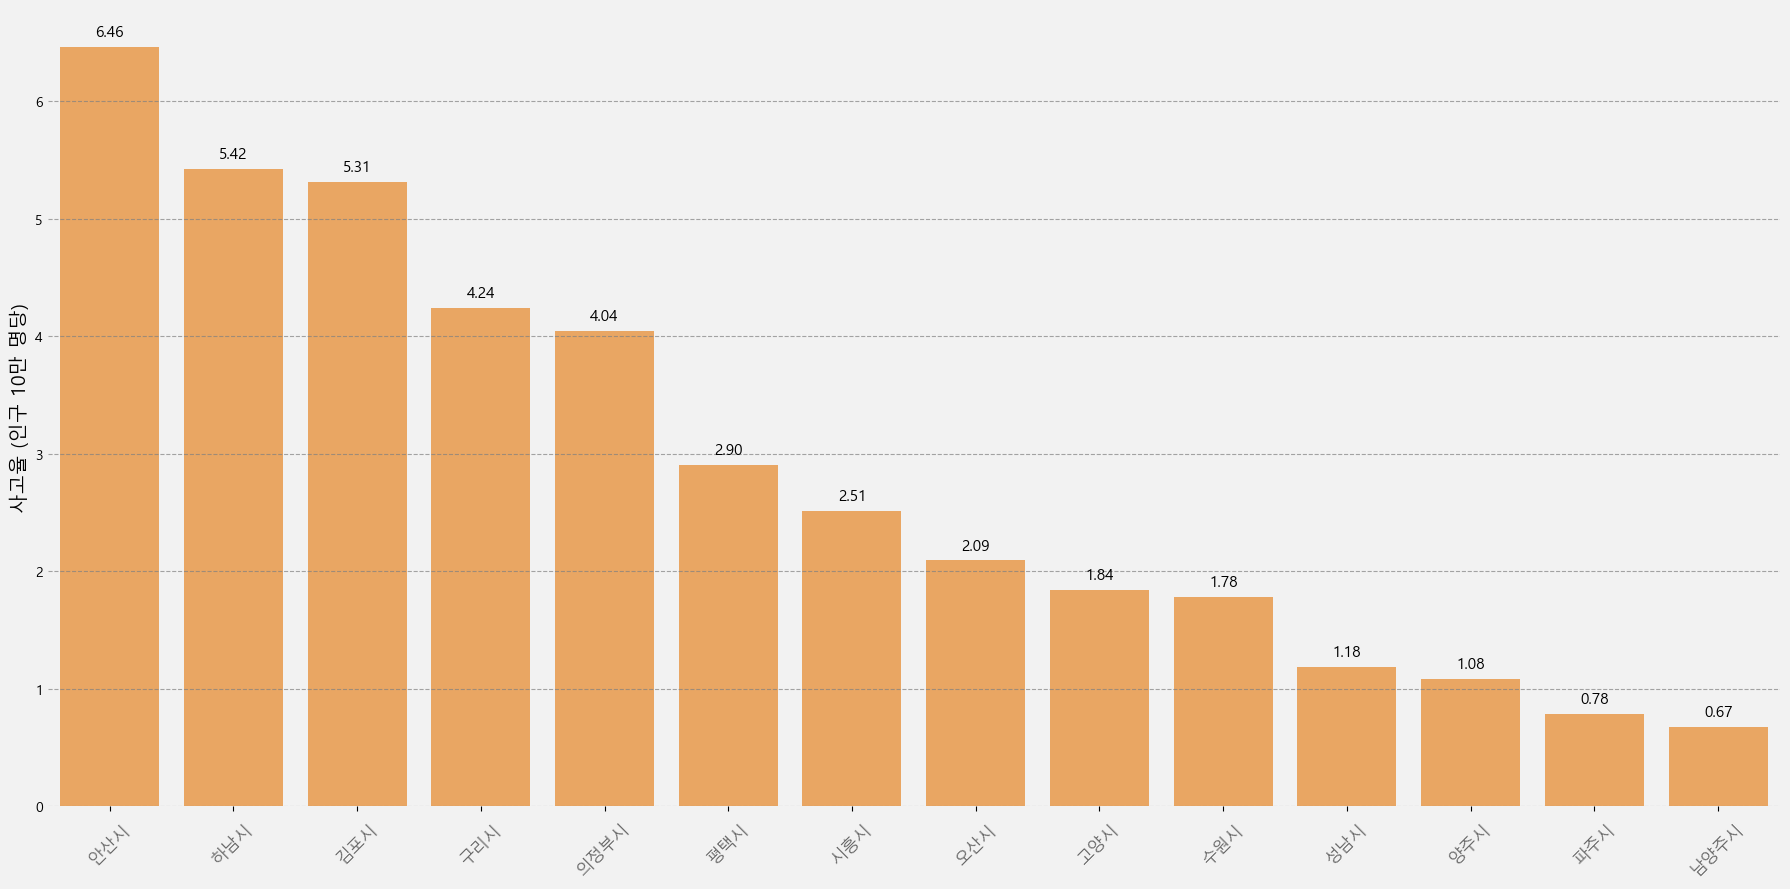

In [84]:
def set_korean_font():
    sys_os = platform.system()
    font_name = 'sans-serif'
    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Linux':
        try:
            import os
            import matplotlib.font_manager as fm
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            font_name = 'NanumGothic'
        except Exception:
            pass

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False 

set_korean_font()

# 3. 데이터 시각화
fig, ax = plt.subplots(figsize=(18, 9))

# 배경 색상 설정 (요청된 #f7f7f7)
BACKGROUND_COLOR = '#f2f2f2' 
COLOR_ACCIDENT = '#FFA64D' # 요청된 주황색 계열 색상
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# seaborn barplot을 사용하여 막대 그래프 생성
bar_plot = sns.barplot(
    x='시군명',
    y='사고율(10만명당)',
    data=df_gg_rate,
    color=COLOR_ACCIDENT,
    ax=ax
)

# 축(Spines) 제거
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# x축 레이블 제거
ax.set_xlabel('')
ax.set_xticklabels([])

# y축 눈금 선 제거
ax.tick_params(axis='y', length=0) 

# 막대 위에 사고율 수치 및 시군명 표시
def add_labels_with_district(plot, data_df):
    for i, p in enumerate(plot.patches):
        height = p.get_height()
        district_name = data_df['시군명'].iloc[i]

        # 1. 사고율 수치 레이블 추가 (소수점 2자리까지 표시)
        plot.annotate(
            f'{height:.2f}', 
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=11, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
        
        # 2. 시군명 레이블 추가 (x축을 대체)
        plot.annotate(
            district_name,
            (p.get_x() + p.get_width() / 2, 0),
            ha='center', va='top',
            fontsize=12, color='dimgray',
            rotation=45,
            xytext=(0, -10), textcoords='offset points'
        )

add_labels_with_district(bar_plot, df_gg_rate)

# y축 선은 제거하고, 그리드 라인 유지
ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

# 그래프 제목 및 라벨 설정
# ax.set_title('경기도 시군별 자전거 사고율 (인구 10만 명당)', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('사고율 (인구 10만 명당)', fontsize=14)

plt.tight_layout()
plt.show()

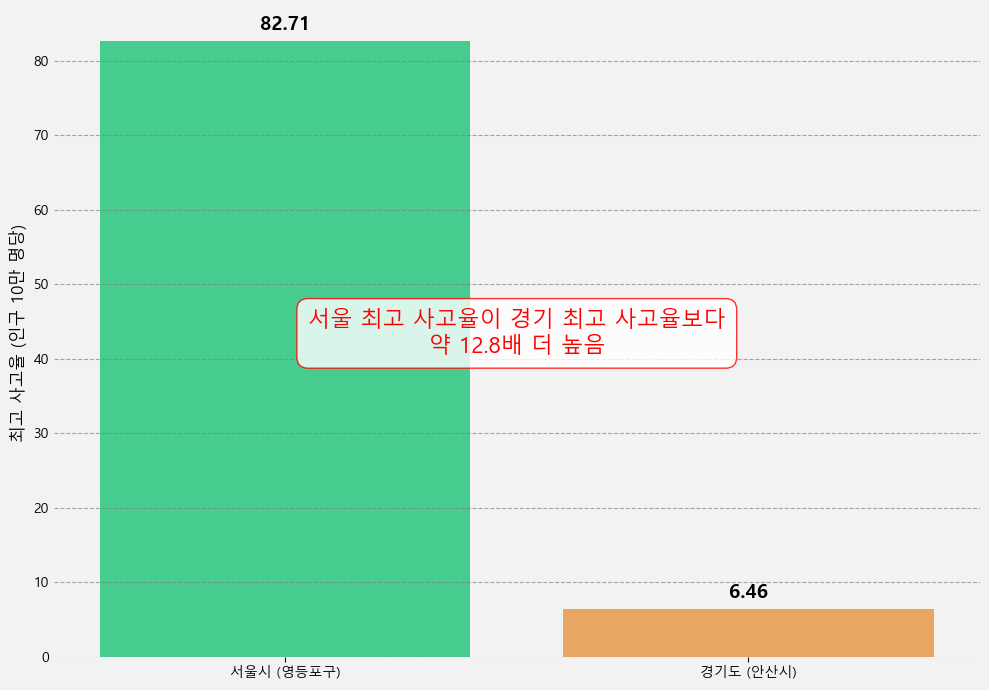

In [86]:
comparison_data = {
    '지역': ['서울시 (영등포구)', '경기도 (안산시)'],
    '최고_사고율(10만명당)': [82.71, 6.46] # 사용자 전제: 서울 최고 82.71, 경기 최고 6.00
}
df_comparison = pd.DataFrame(comparison_data)

# 2. 한글 폰트 설정 (이전과 동일)
def set_korean_font():
    sys_os = platform.system()
    font_name = 'sans-serif'
    # 폰트 설정 로직 (생략)
    if sys_os == 'Windows':
        font_name = 'Malgun Gothic'
    elif sys_os == 'Darwin':
        font_name = 'AppleGothic'
    elif sys_os == 'Linux':
        try:
            import os
            import matplotlib.font_manager as fm
            if 'Ubuntu' in platform.version() or 'colab' in platform.uname().node:
                os.system('apt-get update -qq')
                os.system('apt-get install fonts-nanum -qq')
            fm.fontManager.ttflist.clear()
            fm._rebuild()
            font_name = 'NanumGothic'
        except Exception:
            pass

    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False 

set_korean_font()

# 3. 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 7))

# 배경 색상 설정
BACKGROUND_COLOR = '#f2f2f2' 
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# Seaborn barplot을 사용하여 막대 그래프 생성
bar_plot = sns.barplot(
    x='지역',
    y='최고_사고율(10만명당)',
    data=df_comparison,
    palette=['#30e291', '#FFA64D'], # 서울은 파란색, 경기는 주황색
    ax=ax
)

# 축(Spines) 제거
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Y축 그리드 라인만 유지
ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
ax.tick_params(axis='y', length=0) 

# Y축 레이블 설정
ax.set_ylabel('최고 사고율 (인구 10만 명당)', fontsize=12)
ax.set_xlabel('')

# 4. 막대 위에 수치 및 격차 강조 텍스트 추가
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    
    # 사고율 수치 레이블 (소수점 2자리)
    ax.annotate(
        f'{height:.2f}', 
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=14, color='black',
        fontweight='bold',
        xytext=(0, 5), textcoords='offset points'
    )

ratio = df_comparison['최고_사고율(10만명당)'].iloc[0] / df_comparison['최고_사고율(10만명당)'].iloc[1]

ax.text(
    0.5, 0.5, 
    f'서울 최고 사고율이 경기 최고 사고율보다\n약 {ratio:.1f}배 더 높음', 
    transform=ax.transAxes,
    ha='center', va='center',
    fontsize=16, color='red',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8, ec="red", lw=1)
)

plt.tight_layout()
plt.show()